In [1]:
## Libraries needs to run the tools ##
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
from scipy import interpolate
import math

In [2]:
## read the input files using pandas ##
df = pd.read_csv('../bending_moduli_CL_ff-LB.dat', delim_whitespace=True, names= ["Lipid", "Value","SE"] )
df1 = pd.read_csv('../tilt_moduli_CL-LB.dat', delim_whitespace=True, names= ["Lipid1", "Value1", "SE1"] )

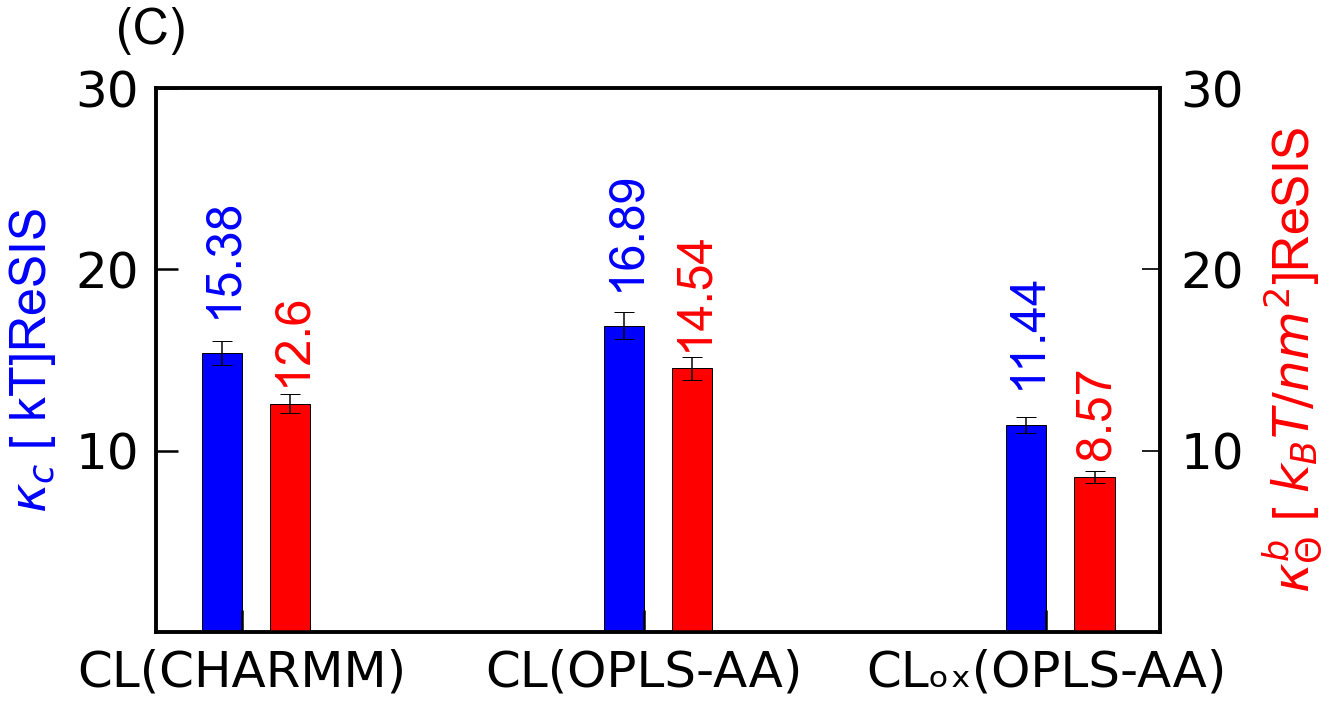

In [5]:
# function to convert to subscript
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)
#df = pd.read_csv('bending_moduli_CL_ff.dat', delim_whitespace=True, names= ["Lipid", "Value","SE"] )
fig = plt.figure(1034, figsize=(18,10))
ax = fig.add_subplot(111)
Lipid = df['Lipid']
STD = df['SE']
STD1 = df1['SE1']
Lipid1=df1['Lipid1']

#plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
A = r'CL(CHARMM){}'.format(get_sub(''))
B = r'CL(OPLS-AA){}'.format(get_sub(''))
C = r'CL{}(OPLS-AA)'.format(get_sub('OX'))
# Again assign Lipid
##Lipid = (A,B,C)
Lipid1 = (A,B,C)
# Read value for 2 decimal point
Value = round(df['Value'], 2)
Value1= round(df1['Value1'], 2)

ax2 = ax.twinx()

ax2.set_ylabel("$\kappa^{b}_{\Theta}$ [ $k_{B}T/nm^{2}$]ReSIS", fontsize=50, fontname='arial', color = 'red', labelpad=17)
ax2.tick_params(axis ='both', which= 'major', labelsize=50, width=2.5, length=22, direction='in',  pad=15)

ax.set_ylabel("$\kappa_c$ [ kT]ReSIS", fontsize=50, fontname='arial', color = 'blue', labelpad=17)
ax.tick_params(axis ='both', which= 'major', labelsize=50, width=2.5, length=22, direction='in', pad=17)

n=3
Lipid = np.arange(n)
width = 0.10

bar1 = ax.bar(Lipid, Value, color = 'b', yerr=STD, width = width, edgecolor = 'black', label='Bending', capsize=10, align='center')
bar2 = ax2.bar(Lipid + 0.12, Value1, color = 'r', yerr=STD1, width = width, edgecolor = 'black', label='Tilt', capsize=10, align='edge')
plt.xticks(Lipid + width/2,(A,B,C))
##plt.xticks(rotation=90, horizontalalignment="center", fontsize=30, fontname='arial')
##plt.legend( (bar1, bar2), ('Bending rigidity ($\kappa_c$)', 'Tilt moduli ($\kappa^{b}_{\Theta}$)'), fontsize=35, loc='upper right', bbox_to_anchor=(0.99, 0.99),  edgecolor='white')
# This is the location for the annotated text
i = 1
j = 2.5
# Annotating the bar plot with the values in column(Value)
for i in range(len(Lipid)):
    #plt.annotate(Value[i], (-0.1 + i, Value[i] + j))
    ax.annotate(Value[i], (-0.05+i,Value[i] + j),rotation=90, color='blue', fontsize=48, fontname='arial')
   ## plt.annotate(Value1[i], (-0.05+i,Value1[i] + j),rotation=90, color='green', fontsize=40, fontname='arial')
#thick axes
i = 0.5
j = 1.5
for i in range(len(Lipid)):
    ##plt.annotate(Value[i], (-0.1 + i, Value[i] + j))
      ax2.annotate(Value1[i], (0.12+i,Value1[i] + j),rotation=90, color='red', fontsize=48, fontname='arial')
#thick axes
from pylab import *
rc('axes', linewidth=3.5)    
#Value = df['Value']
# Read value for 2 decimal point
##plt.xticks(rotation=90, horizontalalignment="center", fontsize=30, fontname='arial')
##ax.set_xlabel('z [nm]',fontsize=50, fontname='arial')
ax.set_ylim([0.01, 30.001])
##plt.yticks(np.arange(0, 40.001, 5 ), fontsize=50, fontname='arial')
#ax2.yaxis.set_minor_locator(plt.MultipleLocator(5))
ax2.set_ylim([0.01, 30.0001])
##ax2.set_xticks(fontname='arial')
#plt.title("Membrane bending moduli", fontsize=24, fontname='arial')
##plt.ylabel("Elastic property of CL",loc='center',fontsize=50, fontname='arial', labelpad=12)
##plt.tick_params(axis ='both', which= 'major', labelsize=50, direction='in', length=18, top=1, right=1, width=1.7)
##plt.bar(Lipid, Value, yerr=STD, width= 0.035, align='center',color='green', edgecolor = 'black', capsize=10)
##plt.bar(Lipid, Value1, yerr=STD, width= 0.035, align='edge',color='blue', edgecolor = 'black', capsize=10)
plt.title("(C)", loc = 'left', y=1.07, x=-0.04, fontsize=50, fontname='arial')
# Saving the plot as a 'png'
#plt.savefig('Barplot_new.pdf',bbox_inches='tight', dpi=600)
plt.savefig('Figure7C.png', bbox_inches='tight', dpi=600)
plt.tick_params(axis ='x', which= 'major', labelsize=50, direction='in', length=18, top=1, right=1, width=1.7, pad=20)
plt.tick_params(axis ='y', which= 'major', labelsize=50, direction='in', length=18, top=1, right=1, width=1.7, pad=20)
#plt.tick_params(axis='both', which='major', pad=25)
# Displaying the bar plot
plt.show()